In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Housing.csv')

# Display the first few rows
print(data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [ ]:
# Checking for missing values
print(data.isnull().sum())

# Encoding binary categorical variables
data['mainroad'] = data['mainroad'].map({'yes': 1, 'no': 0})
data['guestroom'] = data['guestroom'].map({'yes': 1, 'no': 0})
data['basement'] = data['basement'].map({'yes': 1, 'no': 0})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes': 1, 'no': 0})
data['airconditioning'] = data['airconditioning'].map({'yes': 1, 'no': 0})

# Check the data types after encoding
print(data.dtypes)

# Feature scaling (if required)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['area', 'bedrooms', 'bathrooms', 'stories']])
data[['area', 'bedrooms', 'bathrooms', 'stories']] = scaled_features


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad             int64
guestroom            int64
basement             int64
hotwaterheating      int64
airconditioning      int64
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


R^2: 0.27287851871974633
RMSE: 1917103.7021424235


C:\Users\gamaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


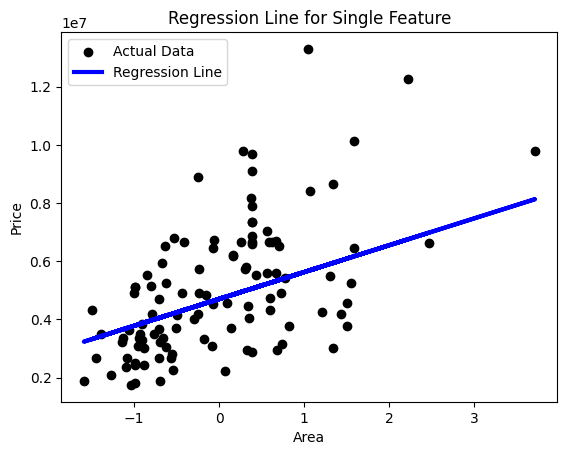

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Single feature regression
X = data[['area']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print('R^2:', r2_score(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

# Plotting
plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Regression Line for Single Feature')
plt.legend()
plt.show()


In [ ]:
# Multiple feature regression
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print('R^2:', r2_score(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))


R^2: 0.6048828690833068
RMSE: 1413204.6185031172


C:\Users\gamaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


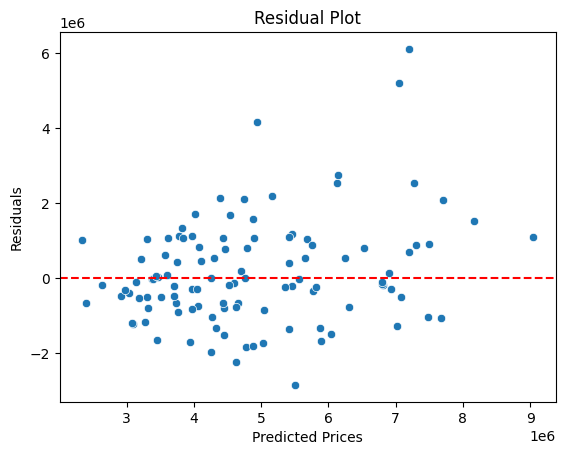

In [ ]:
import seaborn as sns

# Residual plot
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


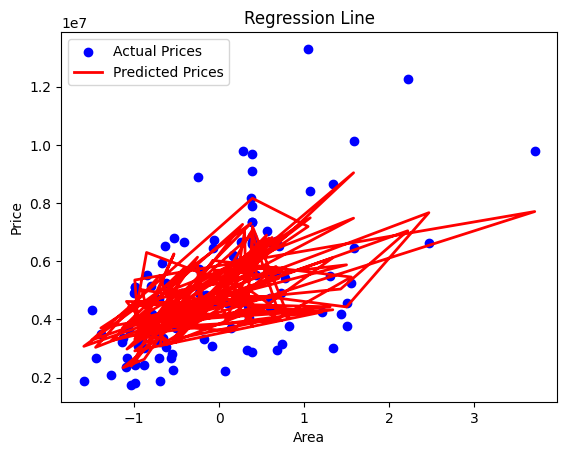

In [ ]:
# Example: Plotting with 'area'
plt.scatter(X_test['area'], y_test, color='blue', label='Actual Prices')
plt.plot(X_test['area'], y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Regression Line')
plt.legend()
plt.show()

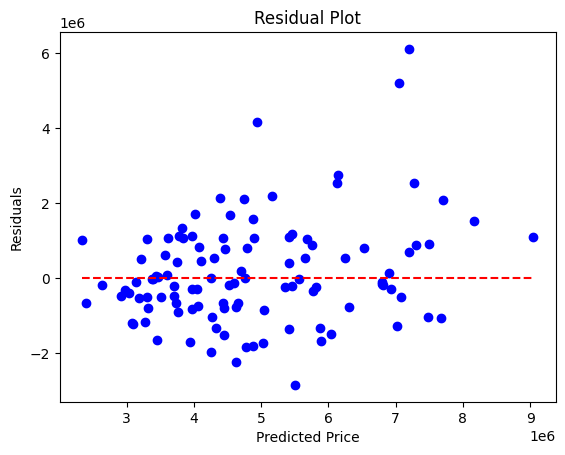

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='blue')
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='red', linestyles='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)
print(coefficients)

           Feature    Coefficient
8  airconditioning  874350.022126
7  hotwaterheating  730701.210274
4         mainroad  612703.897472
0             area  607276.196960
2        bathrooms  562182.884587
6         basement  537474.854585
3          stories  349223.954966
5        guestroom  257501.761914
1         bedrooms   87728.973585


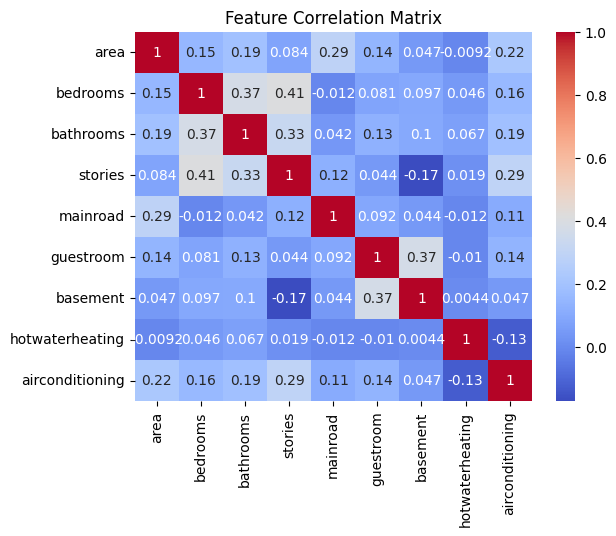

In [ ]:
# Calculate the correlation matrix
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

           Feature       VIF
0             area  1.088617
1         bedrooms  1.352902
2        bathrooms  1.270761
3          stories  1.444820
4         mainroad  1.992296
5        guestroom  1.466097
6         basement  1.904836
7  hotwaterheating  1.063783
8  airconditioning  1.648014
